1 часть. Подключение к VK.

In [32]:
import requests
import json

token = "vk1.a.caZnjqfeaWQIr6TYeK00prOIHgSBIYlDGf3TadrWNRw6ky0bMReTO4agUDgcHrkBhDshxSf9I00m-XdCOc7VUJGjei3HhRZNvsR8oeKzaE_ffYZPLnDdpay11WcyNWh_1yVIkhpC49DKZGp76borEC7nXSoGlkEYBr9u1WcLDMYIad4rVfrDAGU0ARYj-hSz"
api_v = "5.199"

me = requests.get(
    "https://api.vk.com/method/users.get",
    params={
        "access_token": token,
        "v": api_v,
        "fields": "bdate,city,domain,photo_200,status"
    }
)

data = me.json()

user = data["response"][0] 

first_name = user.get("first_name")
last_name = user.get("last_name")
bdate = user.get("bdate")
city = user.get("city", {}).get("title") if user.get("city") else None
domain = user.get("domain")
status = user.get("status")
photo = user.get("photo_200")
print(f"ID:             {user.get('id')}")
print(f"Имя:            {first_name}")
print(f"Фамилия:        {last_name}")
print(f"Дата рождения:  {bdate}")
print(f"Город:          {city}")
print(f"Адрес страницы: https://vk.com/{domain}")
print(f"Статус:         {status}")
print(f"Фото:           {photo}")


friend_id = "ymenyadachianarub"
friend = requests.get(
    "https://api.vk.com/method/users.get",
    params={
        "access_token": token,
        "v": api_v,
        "user_ids": friend_id,
        "fields": "bdate,city,domain,photo_200,status"
    }
)

friend_data = friend.json()

print("\nДруг")
friend_user = friend_data["response"][0]
first_name = friend_user.get("first_name")
last_name = friend_user.get("last_name")
bdate = friend_user.get("bdate")
city = friend_user.get("city", {}).get("title") if friend_user.get("city") else None
domain = friend_user.get("domain")
status = friend_user.get("status")
photo = friend_user.get("photo_200")
print("Информация о друге VK")
print(f"ID:             {friend_user.get('id')}")
print(f"Имя:            {first_name}")
print(f"Фамилия:        {last_name}")
print(f"Дата рождения:  {bdate}")
print(f"Город:          {city}")
print(f"Адрес страницы: https://vk.com/{domain}")
print(f"Статус:         {status}")
print(f"Фото:           {photo}")


ID:             214909960
Имя:            Даниил
Фамилия:        Финков
Дата рождения:  23.2.2000
Город:          Москва
Адрес страницы: https://vk.com/markizz23
Статус:         
Фото:           https://sun1-27.userapi.com/s/v1/ig2/f2S2DFqPzB3F8ND2xECg-Jt4xlxNPWZVu_Jr04TeP2uargsLzvYJxht4smCZfQytkTIAaU_daq_3NmGur7GahmG_.jpg?quality=95&crop=67,256,912,912&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720&ava=1&cs=200x200

Друг
Информация о друге VK
ID:             432580711
Имя:            Миша
Фамилия:        Бирюков
Дата рождения:  20.11.2004
Город:          None
Адрес страницы: https://vk.com/ymenyadachianarub
Статус:         уже несколько часов
Фото:           https://sun1-89.userapi.com/s/v1/ig2/zt5AhWsANBI-zyIdA8cv8RuleOiaeeeRpXvnf32aLu7UWW8KXlEyXsiTy1hLucmSR3mvxgUOxreCTvyVTxl6VGAg.jpg?quality=95&crop=345,374,416,416&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360&ava=1&cs=200x200


2 часть. Граф друзей + DataLens

In [55]:
import pandas as pd
import networkx as nx

all_friends = requests.get(
    "https://api.vk.com/method/friends.get",
    params={
        "access_token": token,
        "v": api_v,
        "user_ids": "markizz23",
        "fields": "city,domain,photo_100,sex,bdate"
    }
).json()

print(all_friends)

{'response': {'count': 284, 'items': [{'id': 6252, 'domain': 'bezgubov', 'city': {'id': 1, 'title': 'Москва'}, 'track_code': 'fcfc9584OKcy_TEg94oXc8WocTsIRzMwGCVRxaCNff5jbBWQx0RVzGGcAnWghxMQqHbazu83IVZqTA', 'sex': 2, 'photo_100': 'https://sun1-16.userapi.com/s/v1/ig2/pxLe3KV-gLMmcR2GSDwfe8xwo8RYmKNp1CgGKJtkdOPPyPOpm78K-NYQB_Qr_3qD4EX7iktO7sYbeqWB8ZHYRC9V.jpg?quality=95&crop=20,22,1761,1761&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720,1080x1080,1280x1280,1440x1440&ava=1&cs=100x100', 'first_name': 'Roman', 'last_name': 'Bezgubov', 'can_access_closed': True, 'is_closed': False}, {'id': 782495, 'domain': 'seregin_89', 'bdate': '8.11.1989', 'city': {'id': 1, 'title': 'Москва'}, 'track_code': '44da7914958Q3w8GBFC280pZTvaRoM-TmLx_OMqen6laplykFaWa9B3rOAhdVLaofuD6CWHJuIfq1RpW', 'sex': 2, 'photo_100': 'https://sun1-55.userapi.com/s/v1/ig2/BjSn0fPxJMac1n3cnZWZcTt1aEuX-mt_WWLiIephNW1bHaAc8sR6gcumSyqHpXKAmzrFVQ7gtf25UmWUmlAi3Pok.jpg?quality=95&crop=212,2,807,

In [56]:
friends_df = pd.json_normalize(all_friends["response"]["items"])
friends_df


,id,domain,track_code,sex,photo_100,first_name,last_name,can_access_closed,is_closed,city.id,city.title,bdate,deactivated
0,6252,bezgubov,fcfc9584OKcy_TEg94oXc8WocTsIRzMwGCVRxaCNff5jbB...,2,https://sun1-16.userapi.com/s/v1/ig2/pxLe3KV-g...,Roman,Bezgubov,True,False,1.0,Москва,NaN,NaN
1,782495,seregin_89,44da7914958Q3w8GBFC280pZTvaRoM-TmLx_OMqen6lapl...,2,https://sun1-55.userapi.com/s/v1/ig2/BjSn0fPxJ...,Александр,Серёгин,True,False,1.0,Москва,8.11.1989,NaN
2,953069,ioann.nikulin,3c01c43704tAAs4_KVjv28ZYNo60kMnKPwSdXB-wHQJOFc...,2,https://sun1-26.userapi.com/s/v1/ig2/AgHY0H_Q1...,Иван,Никулин,True,True,NaN,NaN,16.12.1990,NaN
3,1756049,id1756049,dfaedc08a2cfo76QUuJnab3Eq-n07tJIalKjfOKXbQGQBQ...,2,https://sun1-89.userapi.com/s/v1/ig1/RxqNkcQGv...,Яна,Леонова,True,True,1.0,Москва,24.3,NaN
4,1777365,maxut91,7d6b04e7FXTVp5CT0mYQAwb8WUpIV36ew9VK0nztOl7ZLY...,2,https://sun1-93.userapi.com/s/v1/ig1/2CfkWjvFE...,Максим,Верещагин,True,False,1.0,Москва,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,697343914,id697343914,8f8fbdb2SLSorabplihtbrbXs_pTlBMIo18ARhRRipYGY2...,1,https://sun1-95.userapi.com/impg/DW4IDqvukChyc...,Анастасия,Леонова,True,False,NaN,NaN,12.1.2008,NaN
280,739376580,id739376580,5238caeed7OUERAECMCjdXuMXJCLEHeMogs44Txs1mivhW...,2,https://sun1-47.userapi.com/s/v1/ig2/rnjmhVkcj...,Тимофей,Алексеев,True,False,NaN,NaN,4.9.2004,NaN
281,755907044,id755907044,d935e0e4s0oUapo3dml3B38Me-HmzwQZ8ghiX7deLJv276...,2,https://sun1-93.userapi.com/s/v1/ig2/w3PhShW9g...,Устин,Спартак,True,True,NaN,NaN,30.1.1994,NaN
282,759560238,w0opsy,89072623HBBkMNFg4LxFUB5g9VfSQmYWb1RdQGVu02ZYBk...,2,https://sun1-98.userapi.com/s/v1/ig2/KtWyJWjV3...,Даниил,Бузников,True,False,1.0,Москва,12.5,NaN


In [62]:
subset = friends_df.head(100).copy()
friend_ids = subset["id"].tolist()
len(friend_ids), friend_ids[:5]

(100, [6252, 782495, 953069, 1756049, 1777365])

In [64]:
import time

friends_of = {}

for fid in friend_ids:
    resp = requests.get(
        "https://api.vk.com/method/friends.get",
        params={
            "access_token": token,
            "v": api_v,
            "user_id": fid
        }
    ).json()

    if "error" in resp:
        print(f"Ошибка для {fid}:", resp["error"])
        friends_of[fid] = set()
    else:
        ids = resp["response"]["items"]
        friends_of[fid] = set(ids)

    time.sleep(0.35)   


Ошибка для 181917741: {'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'v', 'value': '5.199'}, {'key': 'user_id', 'value': '181917741'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Ошибка для 184692117: {'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'v', 'value': '5.199'}, {'key': 'user_id', 'value': '184692117'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Ошибка для 211417224: {'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'v', 'value': '5.199'}, {'key': 'user_id', 'value': '211417224'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Ошибка для 243672657: {'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'v', 'value': '5.199'}, {'key': 'user_id', 'value': '243672657'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'val

In [ ]:
G = nx.Graph()

for fid in friend_ids:
    G.add_node(fid)

friend_set = set(friend_ids)

for fid in friend_ids:
    mutuals = friends_of[fid] & friend_set
    for other in mutuals:
        if other != fid:
            G.add_edge(fid, other)

print("Вершин в графе:", G.number_of_nodes())
print("Рёбер в графе:", G.number_of_edges())


Вершин в графе: 100
Рёбер в графе: 156


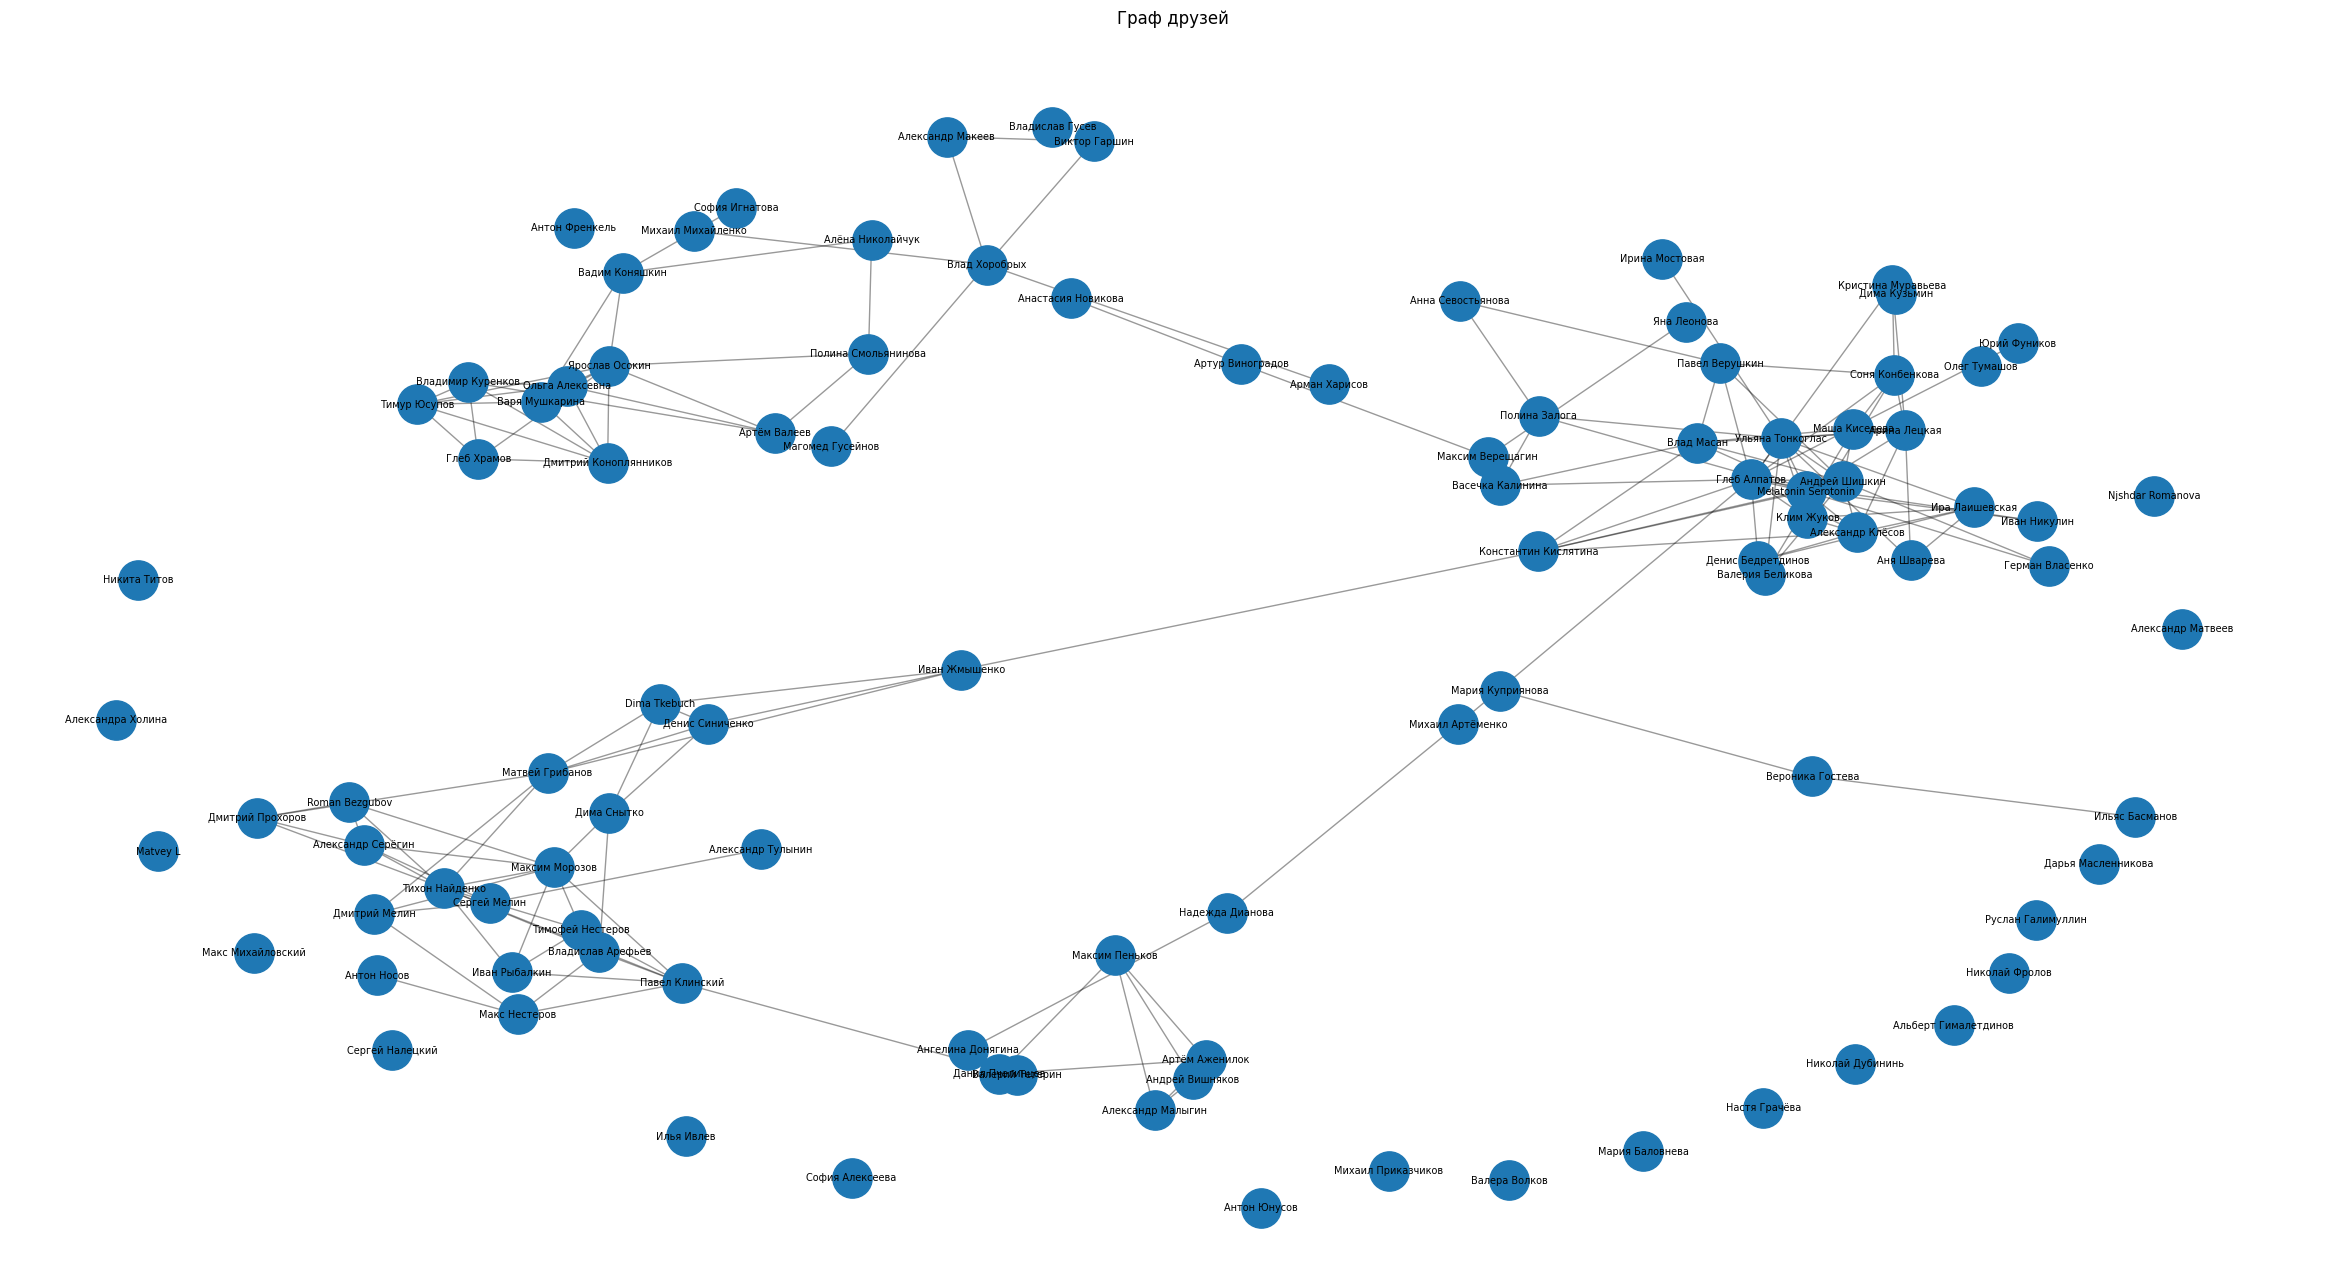

In [111]:
id_to_label = {
    row["id"]: f'{row["first_name"]} {row["last_name"]}'
    for _, row in subset.iterrows()
}

if my_id not in id_to_label:
    id_to_label[my_id] = "Я"

plt.figure(figsize=(30, 16))

pos = nx.spring_layout(G, k=1.2, iterations=200)

nx.draw_networkx_nodes(G, pos, node_size=800)
nx.draw_networkx_edges(G, pos, alpha=0.4)

labels = {n: id_to_label.get(n, str(n)) for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=7)

plt.title("Граф друзей")
plt.axis("off")
plt.show()


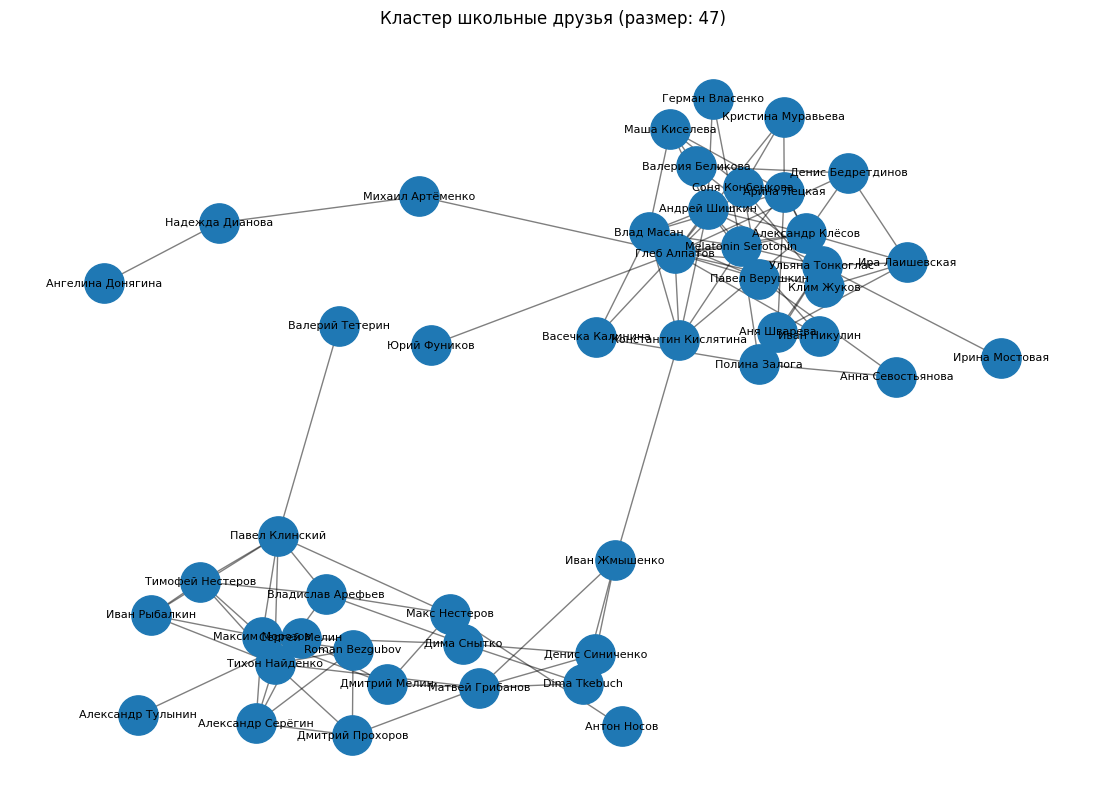

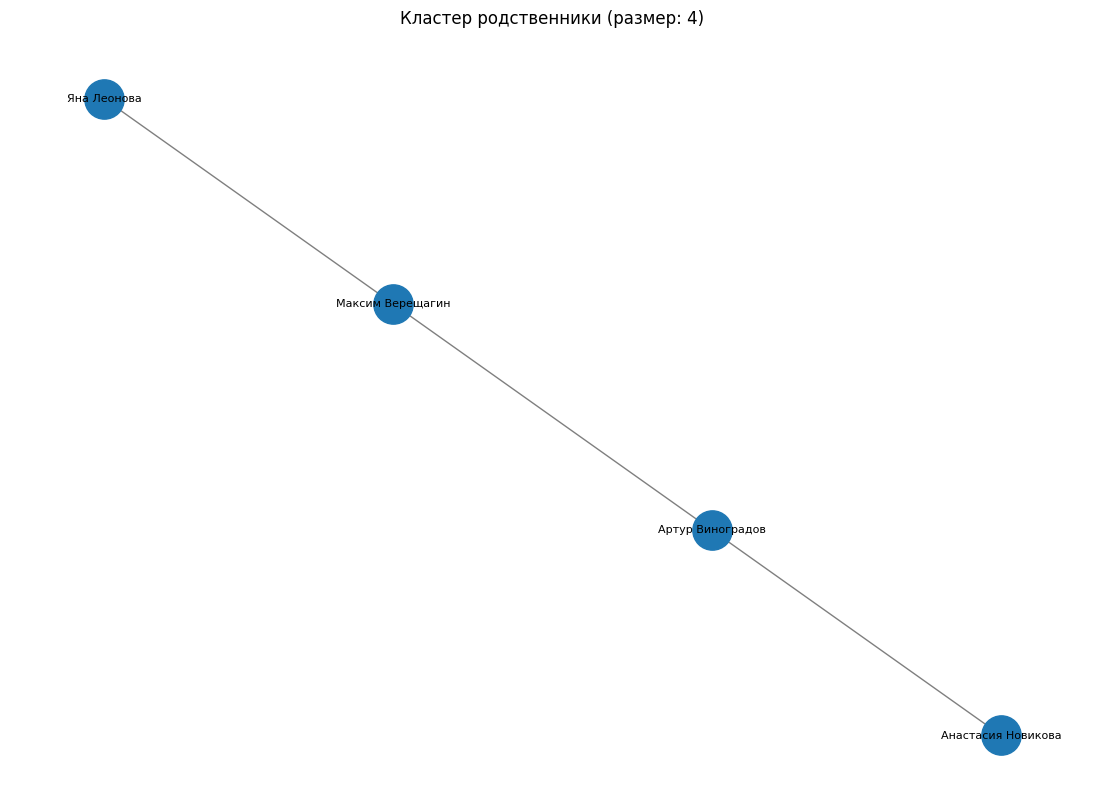

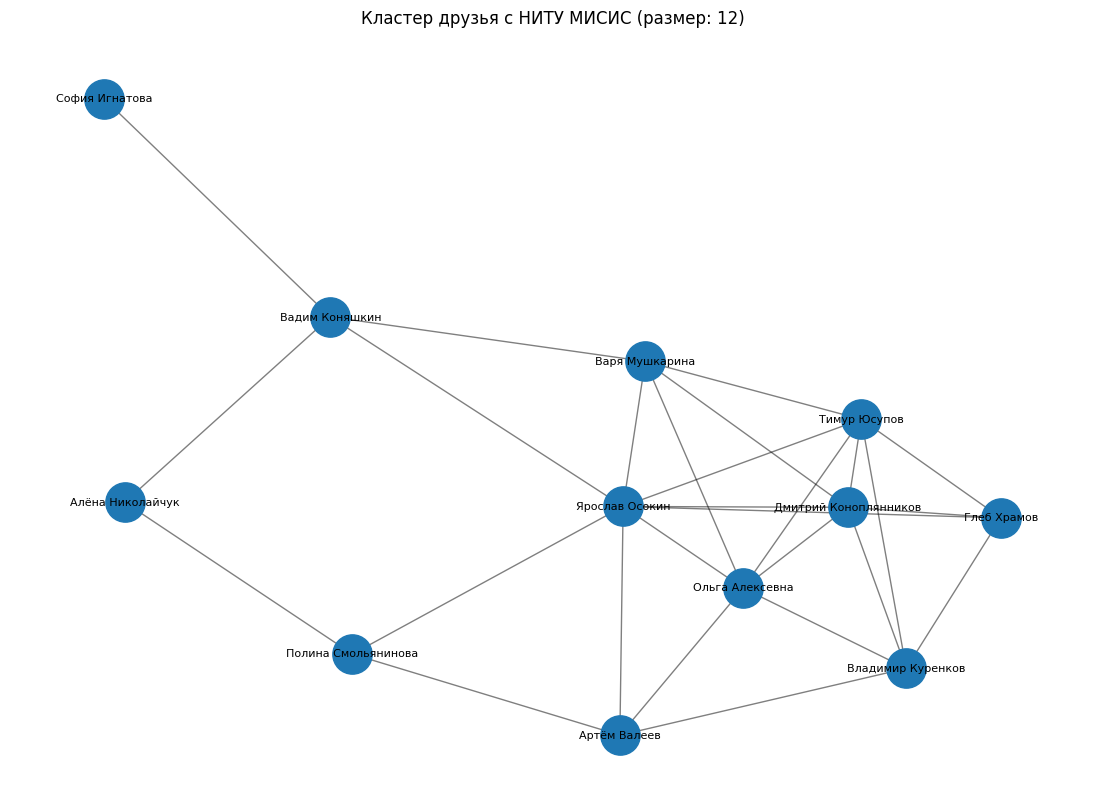

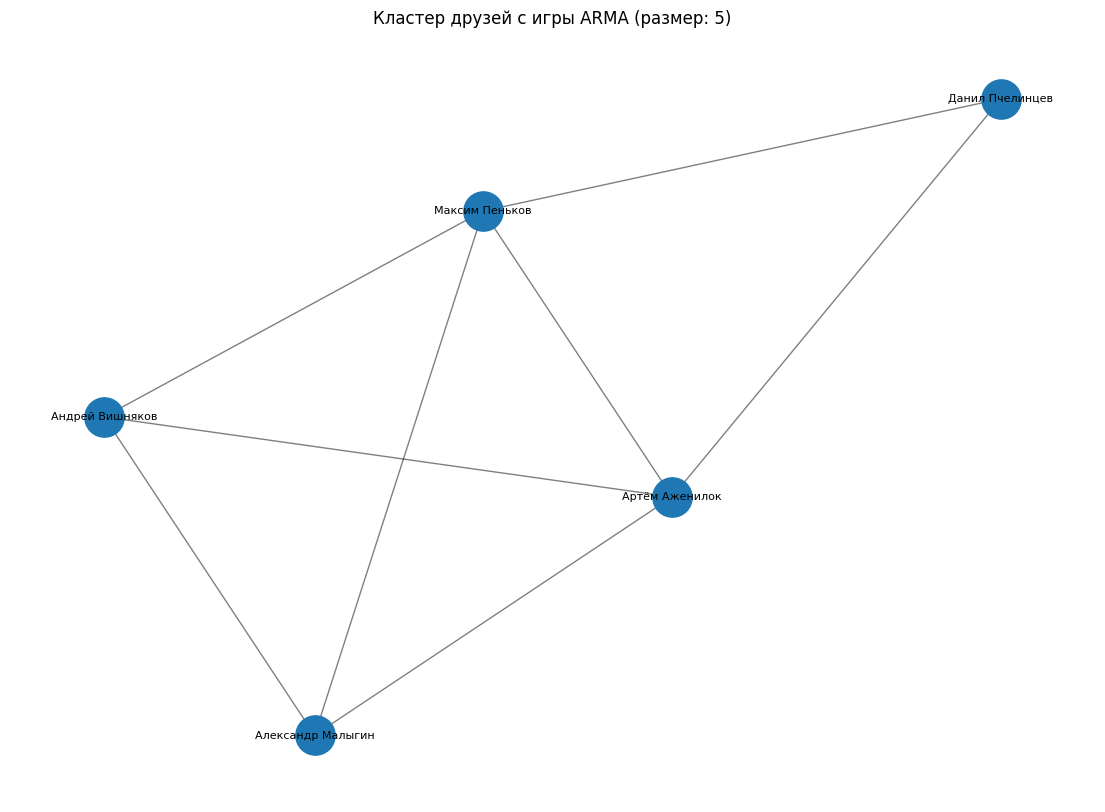

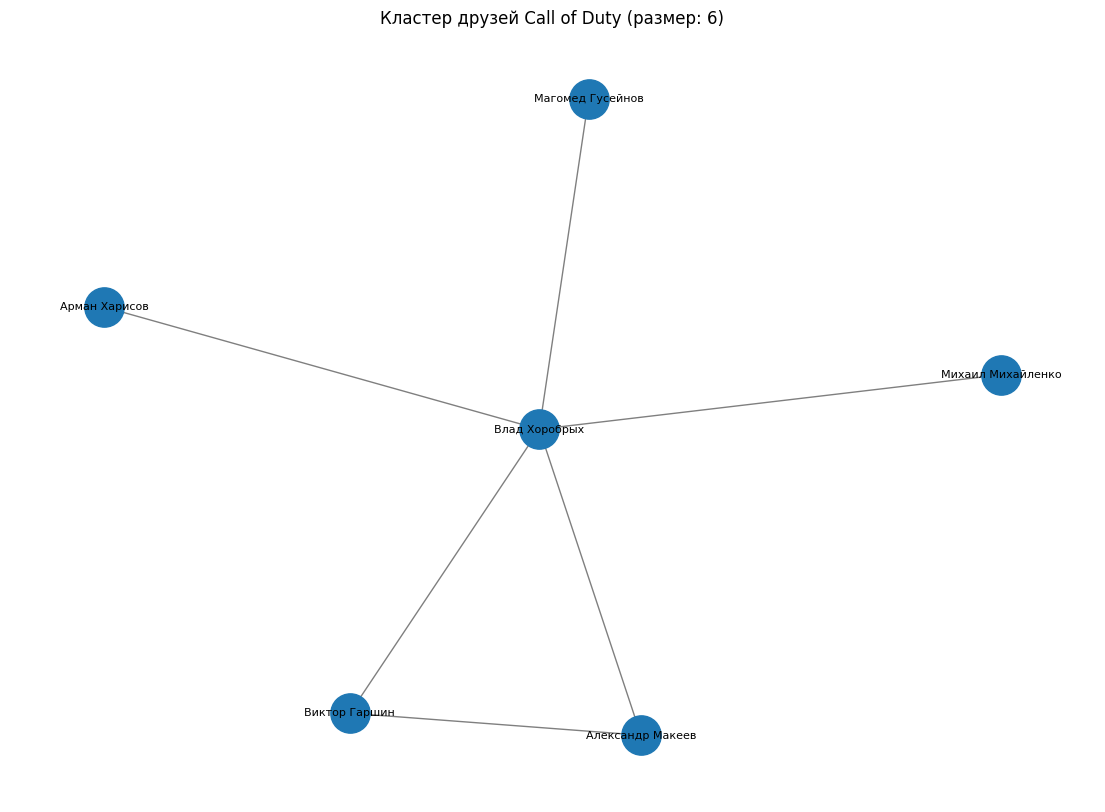

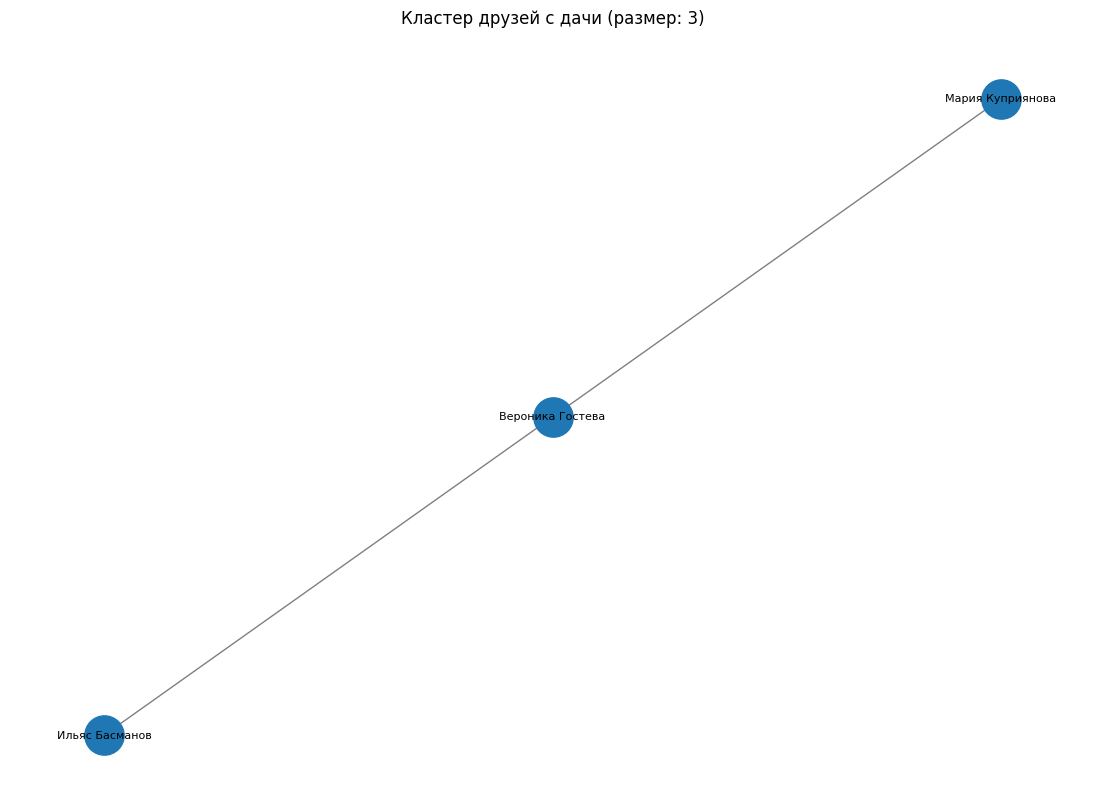

In [147]:
cluster_names = {
    1: "Кластер школьные друзья",
    2: "Кластер родственники",
    3: "Кластер друзья с НИТУ МИСИС",
    4: "Кластер друзей с игры ARMA",
    6: "Кластер друзей Call of Duty",
    16: "Кластер друзей с дачи",
}


components = list(nx.connected_components(G))
for i, comp in enumerate(components, 1):
    if len(comp) == 1:
        continue

    subG = G.subgraph(comp)

    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(subG, k=1.5, iterations=200)

    nx.draw_networkx_nodes(subG, pos, node_size=800)
    nx.draw_networkx_edges(subG, pos, alpha=0.5)

    labels = {n: id_to_label.get(n, str(n)) for n in subG.nodes()}
    nx.draw_networkx_labels(subG, pos, labels, font_size=8)

    cluster_title = cluster_names.get(i, f"Кластер {i}")
    plt.title(f"{cluster_title} (размер: {len(comp)})")
    plt.axis("off")
    plt.show()


In [154]:
city_to_coords = {
    "Москва":       [37.6173, 55.7558],
    "Вологда":      [39.8920, 59.2205],
    "Ереван":       [44.5152, 40.1872],
    "Донецк":       [37.8028, 48.0159],  
    "Тбилиси":      [44.7930, 41.7090],
    "Казань":       [49.1064, 55.7974],
    "Тольятти":     [49.3461, 53.5078],
    "Пермь":        [56.2294, 58.0105],
    "Калуга":       [36.2612, 54.5144],
    "Тверь":        [35.9006, 56.8587],
    "Toronto":      [-79.3832, 43.6532],
    "Екатеринбург": [60.5975, 56.8389],
    "Ульяновск":    [48.4000, 54.3167],
    "Уральск":      [60.0, 54.0],
    "Минск":        [27.5619, 53.9023],
    "Петровск":     [45.3917, 52.3094], 
    "Palmetto":     [-82.5723, 27.5214],
    "Домодедово":   [37.7500, 55.4410],
    "Atlanta":      [-84.3880, 33.7490],
}

#  Unknown города нам не нужны
friends_df["city.title"] = friends_df["city.title"].fillna("Unknown")

city_counts = (
    friends_df["city.title"]
    .value_counts()
    .reset_index()
)
city_counts.columns = ["city", "count"]
city_counts = city_counts[city_counts["city"] != "Unknown"]
city_counts["coords"] = city_counts["city"].map(city_to_coords)
city_counts = city_counts[city_counts["coords"].notna()]
city_counts["geo"] = city_counts["coords"].apply(
    lambda x: f"[{x[0]},{x[1]}]"
)

city_counts[["city", "count", "geo"]].head(20)


,city,count,geo
0,Москва,126,"[37.6173,55.7558]"
2,Вологда,3,"[39.892,59.2205]"
3,Ереван,2,"[44.5152,40.1872]"
4,Донецк,2,"[37.8028,48.0159]"
5,Тбилиси,1,"[44.793,41.709]"
6,Казань,1,"[49.1064,55.7974]"
7,Тольятти,1,"[49.3461,53.5078]"
8,Пермь,1,"[56.2294,58.0105]"
9,Калуга,1,"[36.2612,54.5144]"
10,Тверь,1,"[35.9006,56.8587]"


In [155]:
city_counts[["city", "count", "geo"]].to_csv(
    "Друзья_города.csv",
    index=False,
    encoding="utf-8"
)



Дашборд

https://datalens.yandex/l4fz8qaub83w6

3 часть. Работа с DataLens + API.Геокодер

In [168]:
import random
from datetime import datetime

BASE_URL = "https://api.vk.com/method/users.search"
CITY_ID_MOSCOW = 1 

def vk_users_search(city_id, count=1000, fields=None, offset=0, max_retries=5):
    params = {
        "access_token": token,
        "v": api_v,
        "city": city_id,
        "count": count,
        "offset": offset,
    }
    if fields:
        params["fields"] = ",".join(fields)

    for attempt in range(max_retries):
        response = requests.get(BASE_URL, params=params)
        data = response.json()

        if "error" in data:
            err = data["error"]
            code = err.get("error_code")

            # Flood control
            if code == 9 and attempt < max_retries - 1:
                # увеличиваем паузу с каждой попыткой
                sleep_sec = 1 + attempt
                print(f"Flood control, сплю {sleep_sec} сек и пробую снова...")
                time.sleep(sleep_sec)
                continue
            else:
                raise Exception(err)
        else:
            return data["response"]["items"]

    raise Exception("Max retries exceeded for users.search")

def get_random_users_moscow(total_needed=1000, step=200):
    fields = ["sex", "bdate", "city"]
    users = []

    while len(users) < total_needed:
        offset = random.randint(0, 500000)

        batch = vk_users_search(
            city_id=CITY_ID_MOSCOW,
            count=step,
            fields=fields,
            offset=offset
        )

        users.extend(batch)

        # небольшая пауза, чтобы не триггерить flood
        time.sleep(0.4)  # можно 0.5–1 сек, если всё равно ловишь flood

    users = users[:total_needed]
    return users

users_raw = get_random_users_moscow(total_needed=1000, step=200)
len(users_raw)


Flood control, сплю 1 сек и пробую снова...
Flood control, сплю 2 сек и пробую снова...
Flood control, сплю 3 сек и пробую снова...
Flood control, сплю 4 сек и пробую снова...


Exception: {'error_code': 9, 'error_msg': 'Flood control: too many requests', 'request_params': [{'key': 'v', 'value': '5.199'}, {'key': 'city', 'value': '1'}, {'key': 'count', 'value': '200'}, {'key': 'offset', 'value': '429828'}, {'key': 'fields', 'value': 'sex,bdate,city'}, {'key': 'method', 'value': 'users.search'}, {'key': 'oauth', 'value': '1'}]}